# Clustering Mechanism For Data Censored CSV

In [13]:
import pandas as pd

df = pd.read_csv("csv/data_censored.csv")  # Load dataset
df.head()  # Check the first few rows

,id,period,treatment,x1,x2,x3,x4,age,age_s,outcome,censored,eligible
0,1,0,1,1,1.146148,0,0.734203,36,0.083333,0,0,1
1,1,1,1,1,0.002200,0,0.734203,37,0.166667,0,0,0
2,1,2,1,0,-0.481762,0,0.734203,38,0.250000,0,0,0
3,1,3,1,0,0.007872,0,0.734203,39,0.333333,0,0,0
4,1,4,1,1,0.216054,0,0.734203,40,0.416667,0,0,0


<Axes: xlabel='timeline'>

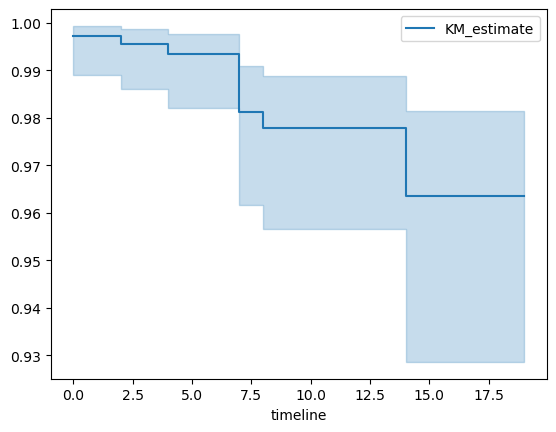

In [9]:
from lifelines import KaplanMeierFitter

kmf = KaplanMeierFitter()
kmf.fit(durations=df["period"], event_observed=df["outcome"])
kmf.plot()

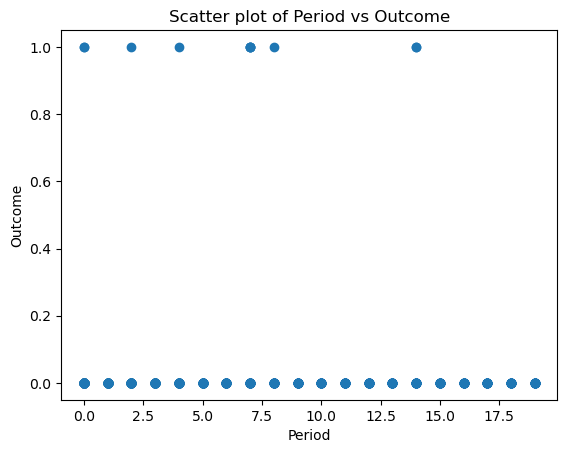

In [10]:
import matplotlib.pyplot as plt

plt.scatter(df["period"], df["outcome"])
plt.xlabel("Period")
plt.ylabel("Outcome")
plt.title("Scatter plot of Period vs Outcome")
plt.show()


C:\Users\rog-melvy\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


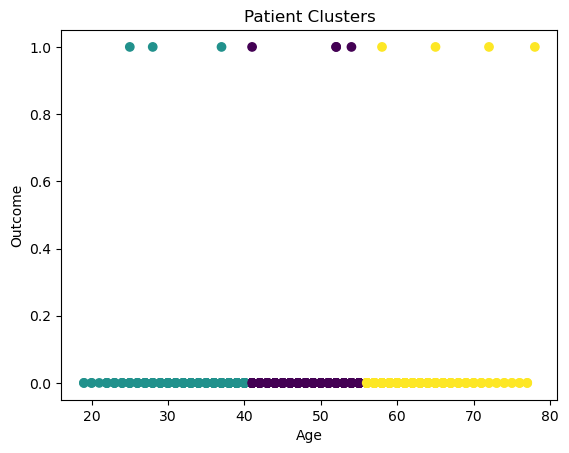

In [25]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Select features for clustering
X = df[["age", "treatment", "outcome"]]  

# Apply K-Means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
df["cluster"] = kmeans.fit_predict(X)

# Visualize clusters
plt.scatter(df["age"], df["outcome"], c=df["cluster"], cmap="viridis")
plt.xlabel("Age")
plt.ylabel("Outcome")
plt.title("Patient Clusters")
plt.show()


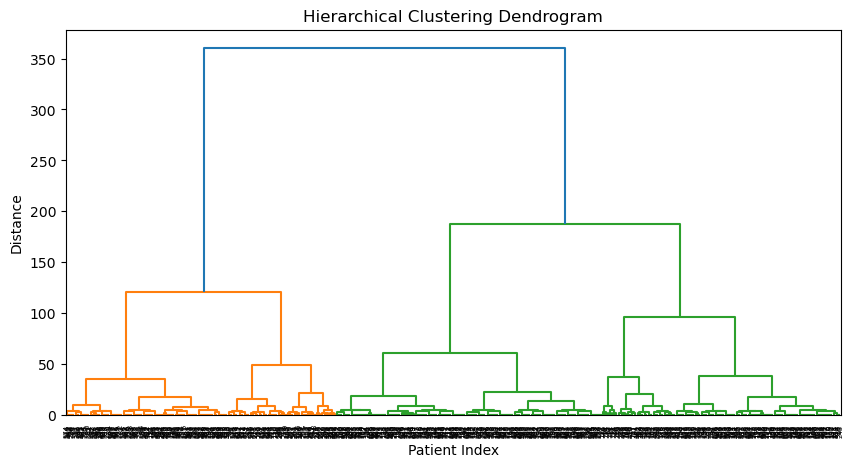

In [23]:
from scipy.cluster.hierarchy import dendrogram, linkage
import seaborn as sns

# Perform hierarchical clustering
linkage_matrix = linkage(X, method="ward")

# Plot the dendrogram
plt.figure(figsize=(10, 5))
dendrogram(linkage_matrix)
plt.title("Hierarchical Clustering Dendrogram")
plt.xlabel("Patient Index")
plt.ylabel("Distance")
plt.show()


In [21]:
from sklearn.mixture import GaussianMixture

# Fit GMM with 3 clusters
gmm = GaussianMixture(n_components=3, random_state=42)
df["cluster"] = gmm.fit_predict(X)

# Check probability distribution of clusters
print(df["cluster"].value_counts())


cluster
0    714
2      9
1      2
Name: count, dtype: int64


C:\Users\rog-melvy\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


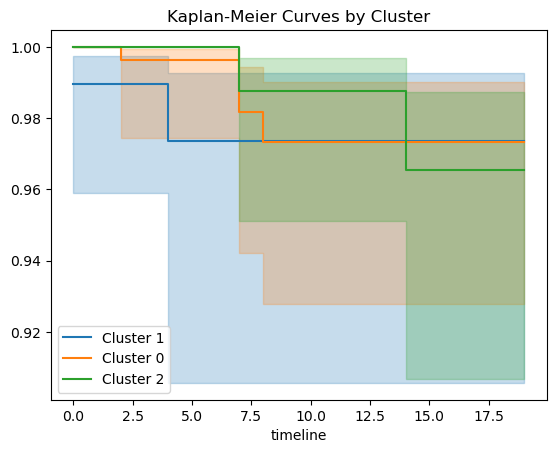

In [19]:
from lifelines import KaplanMeierFitter

kmf = KaplanMeierFitter()

# Fit Kaplan-Meier survival curves for each cluster
for cluster in df["cluster"].unique():
    kmf.fit(durations=df[df["cluster"] == cluster]["period"], 
            event_observed=df[df["cluster"] == cluster]["outcome"], 
            label=f"Cluster {cluster}")
    kmf.plot_survival_function()

plt.title("Kaplan-Meier Curves by Cluster")
plt.show()

C:\Users\rog-melvy\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


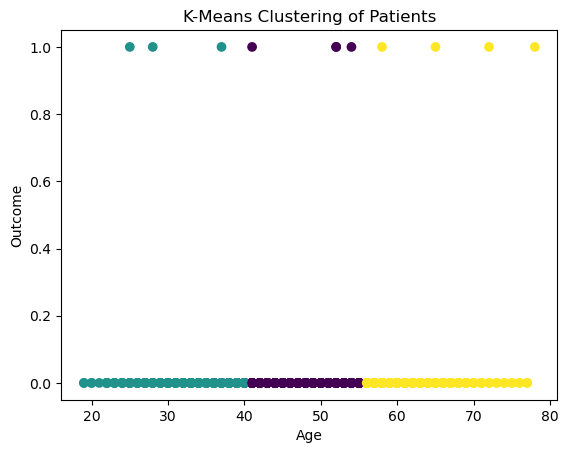

In [17]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Select correct columns for clustering
X = df[["age", "treatment", "outcome"]]

# Apply K-Means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
df["cluster"] = kmeans.fit_predict(X)

# Visualize clusters based on Age and Outcome
plt.scatter(df["age"], df["outcome"], c=df["cluster"], cmap="viridis")
plt.xlabel("Age")
plt.ylabel("Outcome")
plt.title("K-Means Clustering of Patients")
plt.show()
